X_train shape: (3737, 22)
y_train shape: (3737, 1)
X_test shape: (1601, 22)
y_test shape: (1601, 1)
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1.0}
Training RMSE: 0.0111, MAE: 0.0029, R2: 0.9230
Testing RMSE: 0.0111, MAE: 0.0039, R2: 0.9106


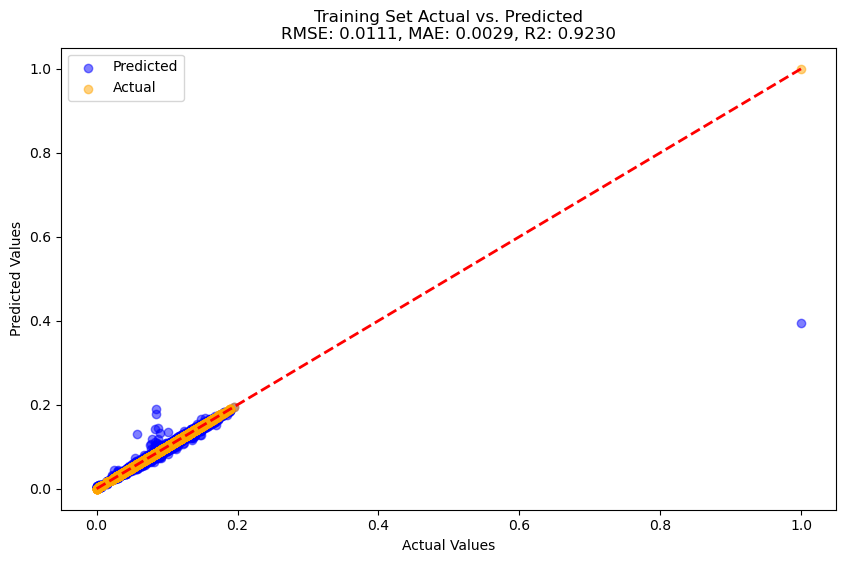

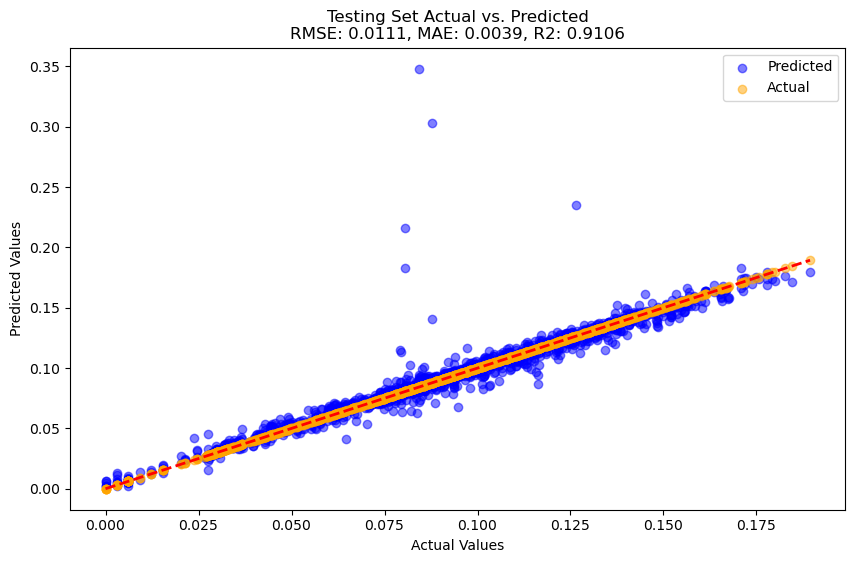

In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import GridSearchCV
import time

# Define the file path to the Excel file
file_path = 'C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_70_30.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Best model after GridSearch
best_xgb_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Make predictions on the datasets
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (4005, 22)
y_train shape: (4005, 1)
X_test shape: (1333, 22)
y_test shape: (1333, 1)
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}
Training RMSE: 0.0098, MAE: 0.0037, R2: 0.9388
Testing RMSE: 0.0155, MAE: 0.0049, R2: 0.8263


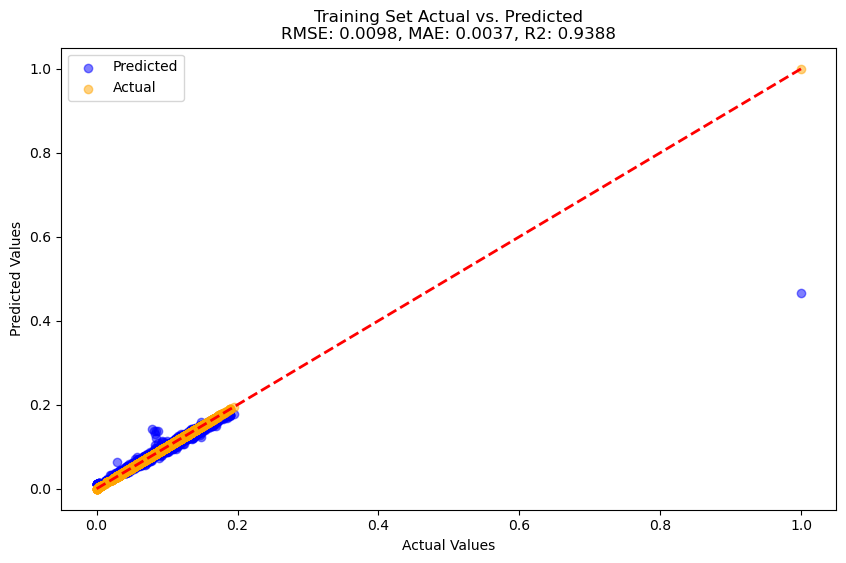

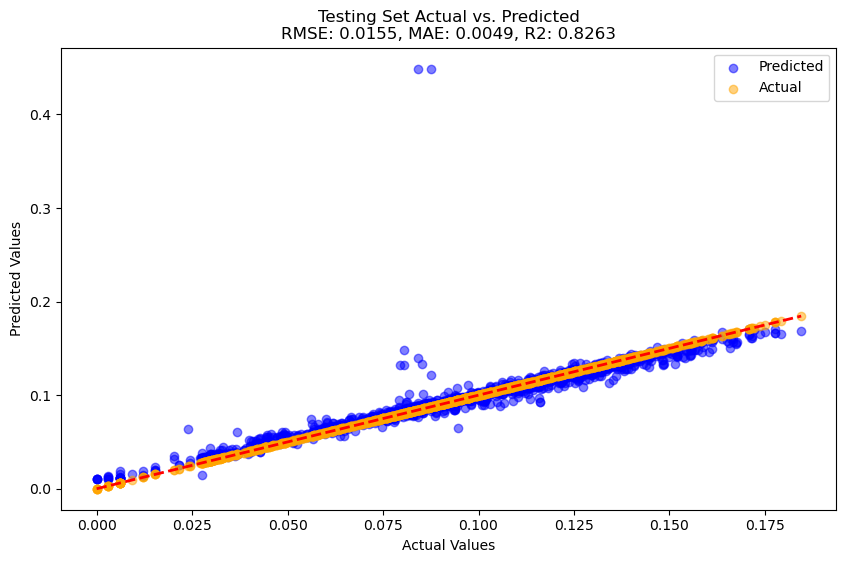

In [16]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import GridSearchCV
import time

# Define the file path to the Excel file
file_path = 'C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_75_25.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Best model after GridSearch
best_xgb_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Make predictions on the datasets
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (4271, 22)
y_train shape: (4271, 1)
X_test shape: (1067, 22)
y_test shape: (1067, 1)
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Training RMSE: 0.0029, MAE: 0.0014, R2: 0.9947
Testing RMSE: 0.0244, MAE: 0.0038, R2: 0.5693


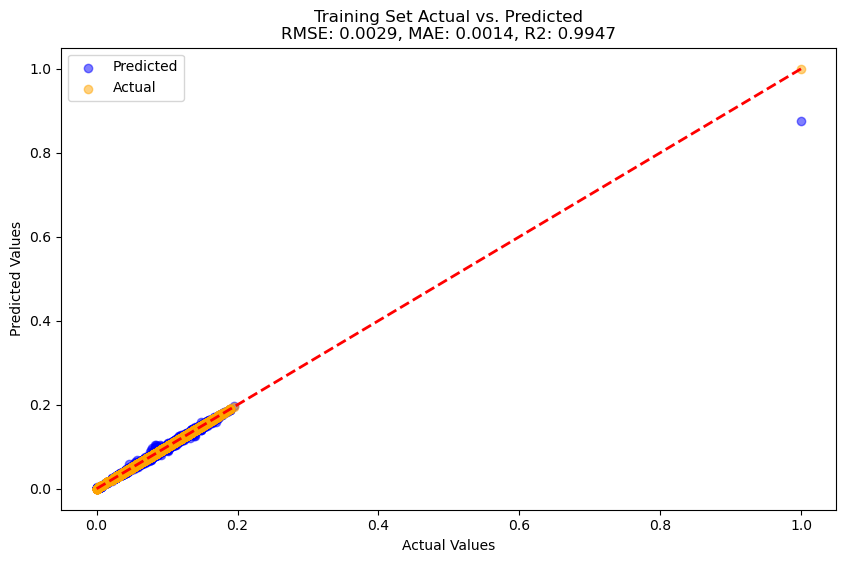

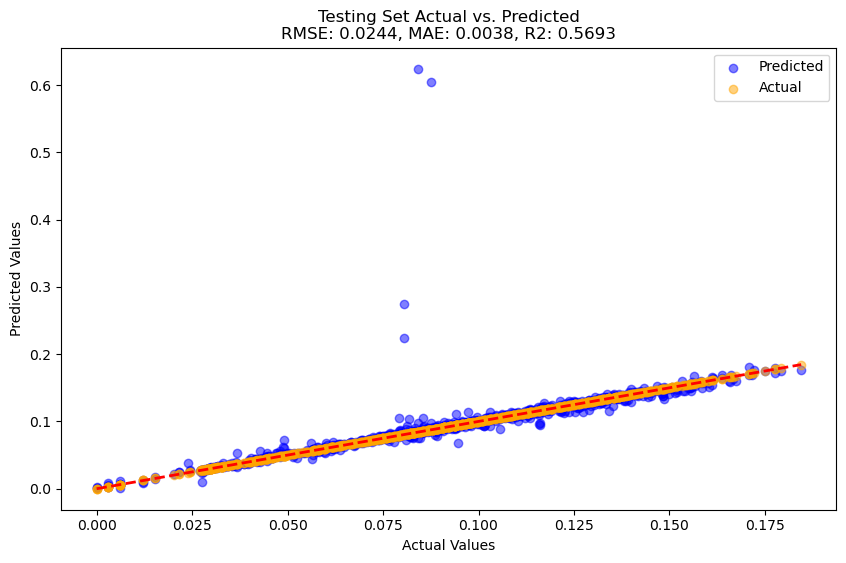

In [14]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import GridSearchCV
import time

# Define the file path to the Excel file
file_path = 'C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_80_20.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Best model after GridSearch
best_xgb_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Make predictions on the datasets
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (101, 26)
y_train shape: (101, 1)
X_test shape: (44, 26)
y_test shape: (44, 1)
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Training RMSE: 0.0070, MAE: 0.0020, R2: 0.9983
Testing RMSE: 0.0822, MAE: 0.0233, R2: 0.7866


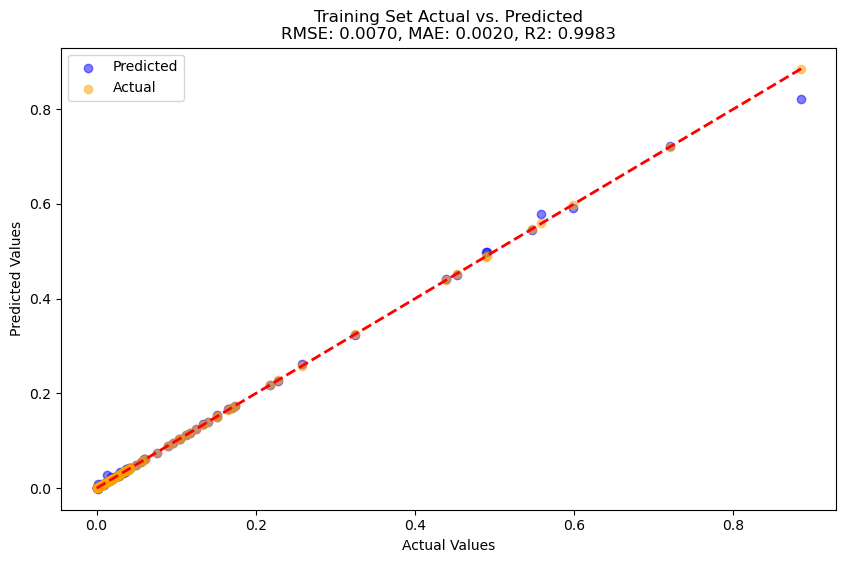

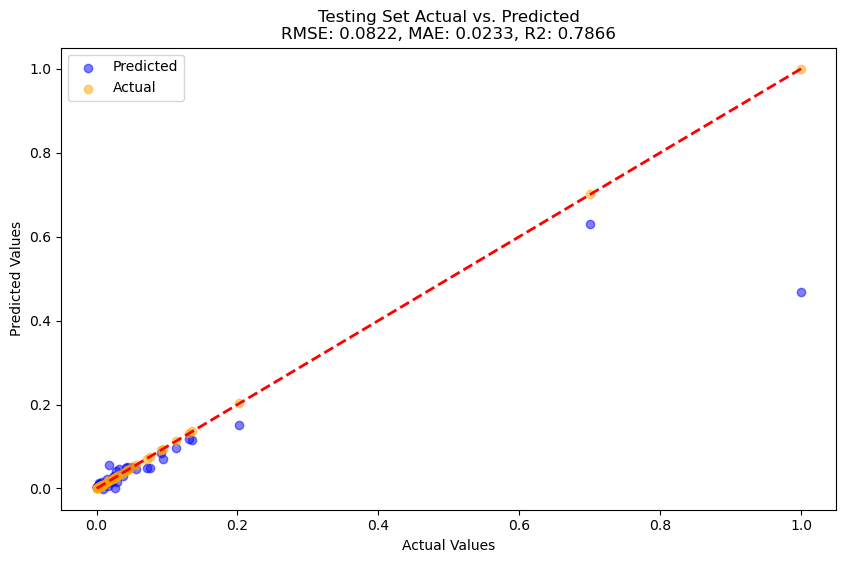

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import GridSearchCV
import time

# Define the file path to the Excel file
file_path = 'C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/capacity_splits_70_30.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Best model after GridSearch
best_xgb_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Make predictions on the datasets
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


# Function to plot the differences
#def plot_differences(y_true, y_pred, title):
    #plt.figure(figsize=(10, 6))
    #sns.scatterplot(x=np.arange(len(y_true)), y=(y_true.flatten() - y_pred.flatten()))
    #plt.title(title)
    #plt.xlabel('Data Point Index')
    #plt.ylabel('Difference (Actual - Predicted)')
    #plt.axhline(y=0, color='r', linestyle='--')
    #plt.show()

# Plot differences for each set
#plot_differences(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
#plot_differences(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (108, 26)
y_train shape: (108, 1)
X_test shape: (37, 26)
y_test shape: (37, 1)
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Training RMSE: 0.0156, MAE: 0.0049, R2: 0.9908
Testing RMSE: 0.0716, MAE: 0.0221, R2: 0.8622


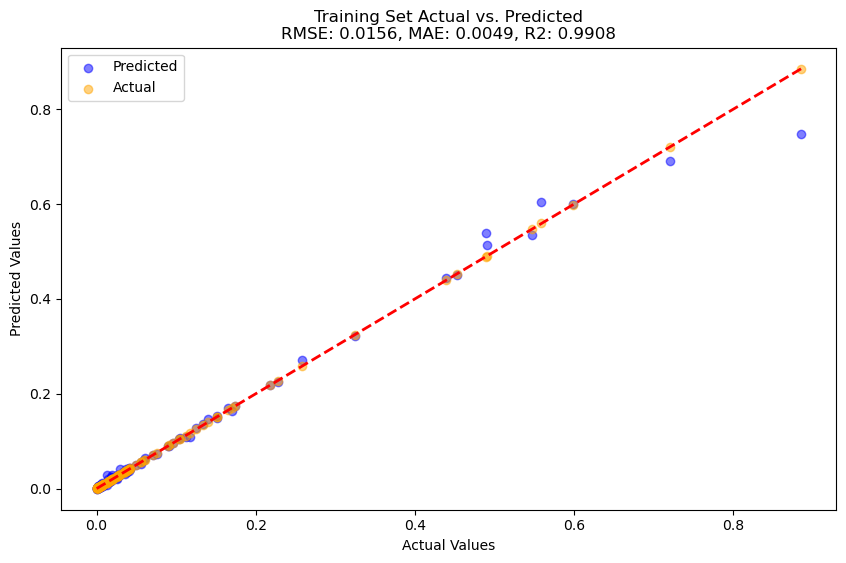

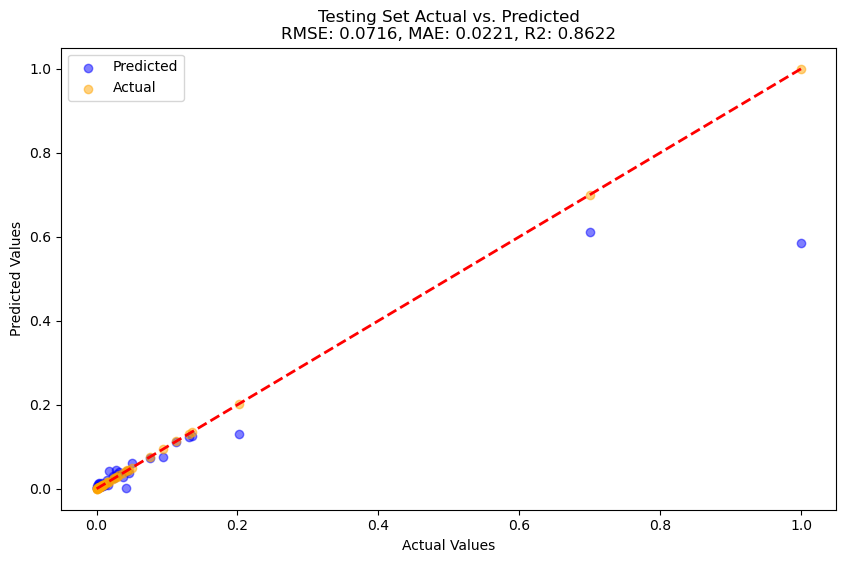

In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import GridSearchCV
import time

# Define the file path to the Excel file
file_path = 'C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/capacity_splits_75_25.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Best model after GridSearch
best_xgb_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Make predictions on the datasets
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (4271, 22)
y_train shape: (4271, 1)
X_test shape: (1067, 22)
y_test shape: (1067, 1)
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best hyperparameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Training RMSE: 0.0029, MAE: 0.0014, R2: 0.9947
Testing RMSE: 0.0244, MAE: 0.0038, R2: 0.5693


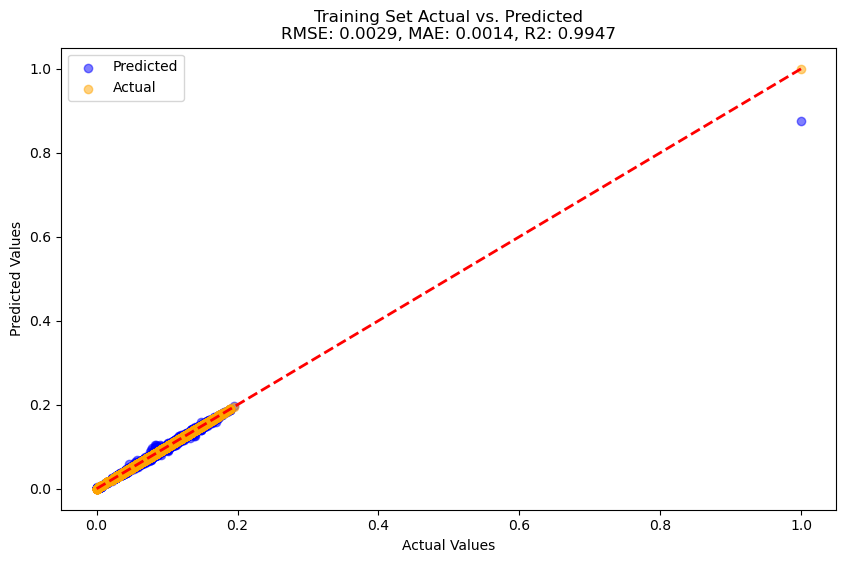

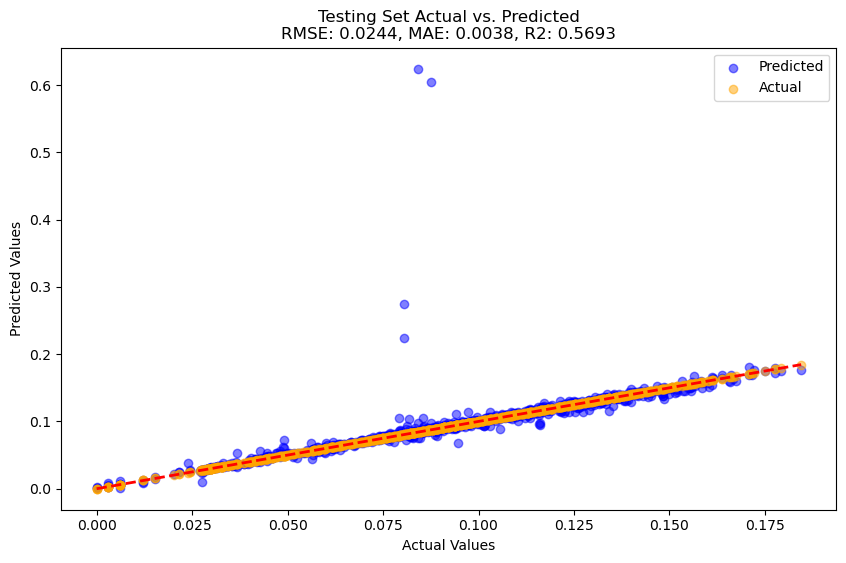

In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import GridSearchCV
import time

# Define the file path to the Excel file
file_path = 'C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_80_20.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Best model after GridSearch
best_xgb_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Make predictions on the datasets
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')
